In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from urllib.parse import urlencode 

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key_1 = 'https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ'
public_key_2 = 'https://disk.yandex.ru/d/jmJxR8yhwCXlaw'
public_key_3 = 'https://disk.yandex.ru/d/DYd4M5b_8RETsA'
public_key_4 = 'https://disk.yandex.ru/d/lqHnH8NOZ458iw'

#assessments
final_url_1 = base_url + urlencode(dict(public_key=public_key_1)) 
response_1 = requests.get(final_url_1) 
url_1 = response_1.json()['href'] 
assessments = pd.read_csv(url_1, sep = ',')

#courses
final_url_2 = base_url + urlencode(dict(public_key=public_key_2)) 
response_2 = requests.get(final_url_2) 
url_2 = response_2.json()['href'] 
courses = pd.read_csv(url_2, sep=',')

#student_assessment
final_url_3 = base_url + urlencode(dict(public_key=public_key_3)) 
response_3 = requests.get(final_url_3) 
url_3 = response_3.json()['href'] 
student_assessment = pd.read_csv(url_3, sep=',')

#student_registration
final_url_4 = base_url + urlencode(dict(public_key=public_key_4)) 
response_4 = requests.get(final_url_4) 
url_4 = response_4.json()['href'] 
student_registration = pd.read_csv(url_4, sep=',')

In [3]:
#сначала посмотрим на каждый детафрейм по отдельности - как они выглядят, данных каких типов содержат, сколько пропущенных значений
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [4]:
#столбец date содержит null значения
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [5]:
#все тесты с непросталенной датой - экзамены
assessments[assessments.isna().any(axis=1)]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [6]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [7]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [8]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [9]:
#столбец score содержит null значения, значит, у 173 студентов нет оценок за какой-то тест
student_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [10]:
#посмотрим на тестах какого типа у стедентов отсутствуют оценки
student_assessment[student_assessment.isna().any(axis=1)] \
    .merge(assessments, how='left', on='id_assessment') \
    .assessment_type.value_counts()

TMA    173
Name: assessment_type, dtype: int64

In [11]:
#все тесты без оценки - это задания с оценкой преподавателя

In [12]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [13]:
#в столбцах date_registration и date_unregistration есть null значения
#отсутствие даты в date_unregistration - это студенты, которые зарегестрировались и закончили обучение
#нужно проверить, почему отсутствуют даты в date_registration
student_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [14]:
#непонятно, почему сюда попали данные о студентах, которые не регистрировались на обучение
#дополнительно: есть строки с студентами, кототрые не регистрировались на обучение, но отменили регистрацию
#возможно, это ошибка работы системы
student_registration[student_registration.date_registration.isna()].head(10)

,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
2538,BBB,2013J,57369,NaN,-1.0
2759,BBB,2013J,342678,NaN,-33.0
5356,BBB,2014B,582496,NaN,-126.0
5490,BBB,2014B,607646,NaN,-38.0
5573,BBB,2014B,614270,NaN,-142.0
6295,BBB,2014B,2409808,NaN,-109.0
6305,BBB,2014B,2439442,NaN,-149.0
8307,BBB,2014J,694001,NaN,-36.0
8975,CCC,2014B,394791,NaN,-61.0


In [15]:
assessments.query('assessment_type == "Exam"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [16]:
#определимся, что будем называть курсом
student_registration.groupby(['code_module', 'code_presentation']) \
    .agg({'id_student': 'count'}) \
    .reset_index()

,code_module,code_presentation,id_student
0,AAA,2013J,383
1,AAA,2014J,365
2,BBB,2013B,1767
3,BBB,2013J,2237
4,BBB,2014B,1613
5,BBB,2014J,2292
6,CCC,2014B,1936
7,CCC,2014J,2498
8,DDD,2013B,1303
9,DDD,2013J,1938


Курсом назовем некую сущность, по которой существует экзамен. Это определенный предмет в определенный семестр.

Например, предмет ААА в семестр 2013J - это один курс.

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).

In [17]:
#объединим 2 датафрейма - student_assessment и assessments по столбцу "id_assessment"
student_assessment_type = pd.merge(student_assessment, assessments, 
                                    how='left', on='id_assessment')

#отфильтруем новый датафрйейм student_assessment_exams по типу теста (= 'Exam') 
#и по оценкам(нужны только сданные экзамены, то есть >= 40)
#сгруппируем по id студентов и посчитаем количество сданных экзаменов каждым студентом
#отберем только тех студентов, количество сданных экзаменов для которых = 1
student_assessment_type.query('assessment_type == "Exam" & score >= 40') \
    .groupby('id_student') \
    .agg({'id_assessment': 'count'}) \
    .reset_index() \
    .query('id_assessment == 1')

,id_student,id_assessment
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


3802 студента успешно сдали только 1 курс.

2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. (10 баллов)

    завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [18]:
#сначала посчитаем успешные попытки
#отберем только успешно сданные тесты, сгруппируем по id теста и посчитаем успешные попытки
success_tries = student_assessment.query('score >= 40') \
    .groupby('id_assessment') \
    .agg({'score': 'count'}) \
    .rename(columns={'score': 'success_tries'}) \
    .reset_index()

#далее отберем вообще все попытки
#сгруппируем по id теста и посчитаем все попытки
overall_tries = student_assessment \
    .groupby('id_assessment') \
    .agg({'score': 'count'}) \
    .rename(columns={'score': 'overall_tries'}) \
    .reset_index()

#объеденим датафрейм assessments с overall_tries и success_tries,
#чтобы посмотреть сколько каждый тест пытались сдавать и сдавали успешно
assessments_exam = pd.merge(pd.merge(assessments, overall_tries,
                            how='left', on='id_assessment'), success_tries,
                        how='left', on='id_assessment')

#оставим только экзамены
assessments_exam = assessments_exam.query('assessment_type == "Exam"')

#посчитаем завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен
assessments_exam['success_score'] = assessments_exam['success_tries'] / assessments_exam['overall_tries']

#уберем все строки, где отсутствуют значения в success_score и отсортируем по возрастанию значений в success_score
assessments_exam.dropna(subset=['success_score']).sort_values('success_score')

,code_module,code_presentation,id_assessment,assessment_type,date,weight,overall_tries,success_tries,success_score
87,DDD,2013B,25340,Exam,240.0,100.0,602.0,504.0,0.837209
72,CCC,2014J,24299,Exam,NaN,100.0,1168.0,1019.0,0.872432
108,DDD,2014J,25368,Exam,NaN,100.0,950.0,842.0,0.886316
62,CCC,2014B,24290,Exam,NaN,100.0,747.0,664.0,0.888889
94,DDD,2013J,25354,Exam,261.0,100.0,968.0,878.0,0.907025
101,DDD,2014B,25361,Exam,241.0,100.0,524.0,485.0,0.925573


ID самого трудного курса - "DDD 2013B" (код предмета + код семестра). ID Экзамена, сдаваемого по данному предмету, - 25340. Процент завершаемости - около 84%.

ID самого простого курса - "DDD 2014B" (код предмета + код семестра). ID Экзамена - 25361. Процент завершаемости - около 93%.

По бОльшей части экзаменов - нет ни одной попытки сдачи.

3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (7 баллов) 

In [19]:
#объеденим датафрейм student_assessment с столбцами code_module и assessment_type датафрейма assessments,
#чтобы понимать, какой тип теста и и какому предмету указан в student_assessment
student_assessment_with_module = pd.merge(student_assessment, 
                                          assessments[['code_module', 'id_assessment', 'assessment_type']],
                                         how='left', on='id_assessment')

#отберем только сданные экзамены, сгруппируем по id предмета, посчитаем среднее значение даты сдачи экзамена студентом
student_assessment_with_module.query('score >= 40 & assessment_type == "Exam"') \
        .groupby('code_module') \
        .agg({'date_submitted': 'mean'}) \
        .round() \
        .reset_index()

,code_module,date_submitted
0,CCC,239.0
1,DDD,238.0


Среднее количество дней, затраченных на сдачу экзамна по предмету CCC - 239 дней. По предмету DDD - 238 дней.

4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). (8 баллов)

In [20]:
#сгруппируем по id предмета, посчитаем, сколько раз записались на предмет и сколько раз запись отменили
reg_amount = student_registration.groupby('code_module') \
    .agg({'date_registration': 'count', 'date_unregistration': 'count'}) \
    .rename(columns={'date_registration': 'amount_of_registrations', 'date_unregistration': 'amount_of_unregistrations'})

#отсоритруем по убыванию столбец "amount_of_registrations", выведем первые три строки
reg_amount.sort_values('amount_of_registrations', ascending=False) \
    .reset_index() \
    .head(3)

,code_module,amount_of_registrations,amount_of_unregistrations
0,BBB,7900,2377
1,FFF,7751,2380
2,DDD,6257,2235


ТОП-3 самых популярных предмета по количеству регистраций на них - BBB, FFF и DDD.

In [21]:
#отток=отписалось/записалось
#добавим новый столбец "outflow", который будет равен количество отписавшихся/количество записавшихся
reg_amount['outflow'] = reg_amount['amount_of_unregistrations'] / reg_amount['amount_of_registrations']

#отсоритруем по убыванию столбец "outflow", выведем первые три строки
reg_amount.sort_values('outflow', ascending=False) \
    .reset_index() \
    .head(3)

,code_module,amount_of_registrations,amount_of_unregistrations,outflow
0,CCC,4426,1947,0.439901
1,DDD,6257,2235,0.357200
2,FFF,7751,2380,0.307057


ТОП-3 предмета с самым большим оттоком - CCC, DDD, FFF

5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.  (15 баллов) 

In [22]:
#завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен
#возьмем  ранее созданный датафрейм assessments_exam, где есть информация о всех и успешных попытках сдать экзамен,
#а также показатель завершаемости каждого экзамена

#отверем только те экзамены, которые хотя бы кто-то сдавал, сгруппируем данные по семестру
#посчитаем сколько раз в этом семестре студенты пытались сдать экзамен и сколько раз сдали успешно
amount_of_exams_by_semester = assessments_exam.dropna(subset=['overall_tries']) \
    .groupby('code_presentation') \
    .agg({'overall_tries': 'sum', 'success_tries': 'sum'}) \
    .reset_index()

#теперь создадим такой же показатель завершаемости, только теперь для всех курсов по семестрам
amount_of_exams_by_semester['finishing_score'] = amount_of_exams_by_semester['success_tries'] / amount_of_exams_by_semester['overall_tries']

#отсоритруем по возрастанию завершаемости и выведем первую строку
amount_of_exams_by_semester.sort_values('finishing_score') \
    .reset_index() \
    .head(1)

,index,code_presentation,overall_tries,success_tries,finishing_score
0,0,2013B,602.0,504.0,0.837209


Семестр с самой низкой завершаемостью курсов - 2013B. Процент завершаемости около 84%.

In [23]:
#теперь второй вопрос - самый долгий средний срок сдачи курсов
#возьмем ранее созданный датафрейм student_assessment_type, содержащий результаты тестов студентов + то, какой тест они сдавали
#отберем только экзамены, сгруппируем данные по семестру, найдем среднюю дату сдачи экзамена
#отсоритруем по убыванию даты, выведем первую строку
student_assessment_type.query('assessment_type == "Exam"') \
    .groupby('code_presentation') \
    .agg({'date_submitted': 'mean'}) \
    .round(2) \
    .reset_index() \
    .sort_values('date_submitted', ascending=False) \
    .head(1)

,code_presentation,date_submitted
3,2014J,243.67


Семестр с самыми долгими средними сроками сдачи курсов - 2014J. В среднем для завершения курса в этом семестре было необходимо 244 дня.

6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Описание подхода можно найти тут. (23 балла)

- R - среднее время сдачи одного экзамена

- F - завершаемость курсов

- M - среднее количество баллов, получаемое за экзамен

In [24]:
#для начала корректно обработаем данные для каждой метрики

In [25]:
#первая метрика - R
#для нахождения среднего времени сдачи экзамена смерджим датафреймы student_assessment_type и assessments_exam
#отберем только экзамены, сгруппируем данные по id студента
#посчитаем, сколько в среднем каждому студенту необходимо дней для сдачи экзамена
R = pd.merge(student_assessment_type[['id_student', 'id_assessment', 'date_submitted']], assessments_exam,
            how='left', on='id_assessment') \
    .query('assessment_type == "Exam"') \
    .groupby('id_student') \
    .agg({'date_submitted': 'mean'}) \
    .reset_index()
R.head()

,id_student,date_submitted
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0


In [26]:
#теперь вторая метрика - F
#завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен
#сначала посчитаем все попытки сдать экзамены
F_1 = student_assessment_type \
    .query('assessment_type == "Exam"') \
    .groupby('id_student') \
    .agg({'assessment_type': 'count'}) \
    .rename(columns={'assessment_type': 'overall_tries'}) \
    .reset_index()

#затем посчитаем успешные попытки сдать экзамены
F_2 = student_assessment_type \
    .query('assessment_type == "Exam" & score >= 40') \
    .groupby('id_student') \
    .agg({'assessment_type': 'count'}) \
    .rename(columns={'assessment_type': 'successful_tries'}) \
    .reset_index()

#объеденим эти датафреймы и добавим колонку с завершаемостью
#данные в ней могут принимать значения от 0 до 1, где 
#0 - это нет ни одного успешного сданного экзамена, а 1 - это все сдаваемые экзамены были сданы успешно
F_3 = pd.merge(F_1, F_2, on='id_student', how='left')
F_3['success_score'] = F_3['successful_tries'] / F_3['overall_tries']
F = F_3[['id_student', 'success_score']]
F.head()

,id_student,success_score
0,23698,1.0
1,24213,1.0
2,27116,1.0
3,28046,1.0
4,28787,1.0


In [27]:
#теперь третья метрика - M
#для нахождения среднего кол-ва баллов, получаемых за экзамен, смерджим датафреймы student_assessment_type и assessments_exam
#отберем только экзамены, сгруппируем данные по id студента
#посчитаем, сколько в среднем каждый студент получает баллов за экзамен
M = pd.merge(student_assessment_type[['id_student', 'id_assessment', 'date_submitted', 'score']], assessments_exam,
            how='left', on='id_assessment') \
    .query('assessment_type == "Exam"') \
    .groupby('id_student') \
    .agg({'score': 'mean'}) \
    .reset_index()
M.head()

,id_student,score
0,23698,80.0
1,24213,58.0
2,27116,96.0
3,28046,40.0
4,28787,44.0


In [28]:
#теперь объеденим все три датафрейма R, M, F, перемеинуем колонки и посмотрим на данные
RFM = pd.merge(R, 
              pd.merge(F, M, how='left', on='id_student'),
              how='left', on='id_student')
RFM = RFM.rename(columns={'date_submitted': 'recency',
                         'success_score': 'frequency',
                         'score': 'monetary'}).fillna(0)
RFM.head()

,id_student,recency,frequency,monetary
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0


In [29]:
#посмотрим на описательную статистику recency
RFM.recency.describe()

count    4633.000000
mean      238.462227
std         5.653378
min       229.000000
25%       234.000000
50%       241.000000
75%       243.000000
max       285.000000
Name: recency, dtype: float64

In [30]:
#удобно будет разделить по квантилям - 75% и 25%

recency:
 - люди, которые в среднем потратили 243 дня и более для сдачи экзамена
 - люди, которые в среднем потратили от 234 до 242 дней для сдачи экзамена
 - люди, которые в среднем потратили 233 дня и менее для сдачи экзамена

In [31]:
#посмотрим на описательную статистику frequency
RFM.frequency.describe()

count    4633.000000
mean        0.881286
std         0.321142
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: frequency, dtype: float64

In [32]:
#описательная статистика по frequency не дала нам никакой интересной информации
#посмотрим, какие значения frequency вообще есть и сколько их
RFM.frequency.value_counts()

1.0    4069
0.0     536
0.5      28
Name: frequency, dtype: int64

In [33]:
#удобно будет разделить по значениям

frequency:
   - люди, не завершившие ни одного курса, который начали
   - люди, завершившие половину курсов, которые начали
   - люди, которые завершили все курсы, которые начали

In [34]:
#посмотрим на описательную статистику monetary
RFM.monetary.describe()

count    4633.000000
mean       65.117958
std        20.470561
min         0.000000
25%        50.000000
50%        66.000000
75%        82.000000
max       100.000000
Name: monetary, dtype: float64

In [35]:
#дополнительно к этому мы знаем, что порог сдачи экзамена - 40 баллов, учтем это при разделении на группы
#остальное поделим по квантилям - 50% и 75%

monetary:
- люди, не перешедшие порог в 40 баллов (б < 40)
- люди, набравшие среднее количество баллов (40 <= б < 66)
- люди, набравшие хорошее количество баллов (66 <= б < 82)
- люди, набравшие высокие баллы (б >= 82)

In [36]:
#выведем квантили в словарь
quintiles = RFM[['recency', 'monetary']].quantile([.25, .5, .75]).to_dict()

#объявим функции для присвоения ранга по каждой метрике и присвоим каждому студенту свой "балл"
def r_score(x):
    if x <= quintiles['recency'][.25]:
        return 1
    elif quintiles['recency'][.25] < x <= quintiles['recency'][.75]:
        return 2
    else:
        return 3

def f_score(x):
    if x == 1:
        return 1
    elif x == 0.5:
        return 2
    else:
        return 3
    
def m_score(x):
    if x >= quintiles['monetary'][.75]:
        return 1
    elif quintiles['monetary'][.5] <= x < quintiles['monetary'][.75]:
        return 2
    elif 40 <= x < quintiles['monetary'][.5]:
        return 3
    else:
        return 4

RFM['R'] = RFM['recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['frequency'].apply(lambda x: f_score(x))
RFM['M'] = RFM['monetary'].apply(lambda x: m_score(x))
RFM['RFM_score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM.head()

,id_student,recency,frequency,monetary,R,F,M,RFM_score
0,23698,243.0,1.0,80.0,2,1,2,212
1,24213,236.0,1.0,58.0,2,1,3,213
2,27116,243.0,1.0,96.0,2,1,1,211
3,28046,237.0,1.0,40.0,2,1,3,213
4,28787,243.0,1.0,44.0,2,1,3,213


In [37]:
#посмотрим на то, какие "баллы" вообще есть и сколько их
RFM.RFM_score.value_counts()

213    862
212    598
113    571
211    493
111    364
112    359
311    324
313    302
234    240
312    196
134    179
334    117
223     13
123      8
224      5
124      1
324      1
Name: RFM_score, dtype: int64

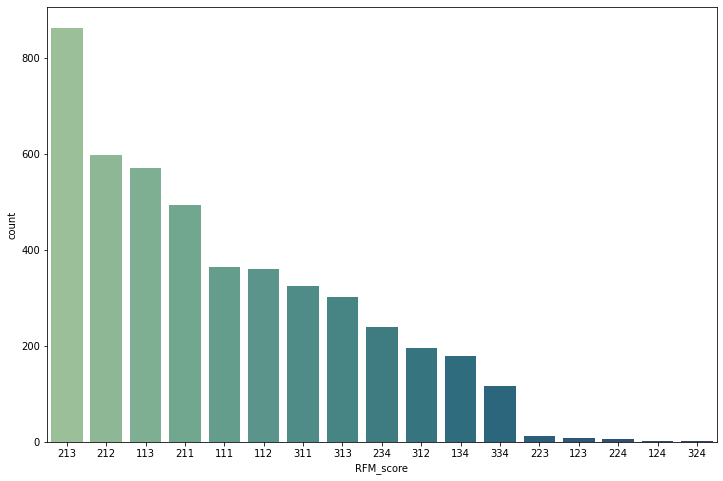

In [38]:
plt.figure(figsize=(12, 8))
sns.countplot(data = RFM, x = 'RFM_score', 
              order = RFM['RFM_score'].value_counts().index, palette = 'crest')

In [39]:
#определим кластеры, основаясь на R и M - среднем времени сдачи одного экзамена и среднем количестве баллов
segt_map = {
    r'1[1-3]': 'passed_fast', #потратили немного времени и сдали
    r'14': 'failed_fast', #потратили немного времени, но не прошли порог
    
    r'2[1-3]': 'passed', #потратили среднее количество времени и сдали
    r'24': 'failed', #потратили среднее количество времени и не прошли порог
    
    r'3[1-3]': 'passed_slow', #потратили много времени, но сдали
    r'34': 'failed_slow', #потратили много времени и не прошли порог
}

RFM['segment'] = RFM['R'].map(str) + RFM['M'].map(str)
RFM['segment'] = RFM['segment'].replace(segt_map, regex=True)
RFM.head()

,id_student,recency,frequency,monetary,R,F,M,RFM_score,segment
0,23698,243.0,1.0,80.0,2,1,2,212,passed
1,24213,236.0,1.0,58.0,2,1,3,213,passed
2,27116,243.0,1.0,96.0,2,1,1,211,passed
3,28046,237.0,1.0,40.0,2,1,3,213,passed
4,28787,243.0,1.0,44.0,2,1,3,213,passed
